## installation of Ultralytics dependencies in google Colab

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install ultralytics

In [ ]:
!pip install --upgrade gdown
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11

/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11


## Loading the Yolov11 model, with segmentation features

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11m-seg.pt")

100%|██████████| 43.3M/43.3M [00:00<00:00, 80.2MB/s]


## Training the model on our custom dataset thanks to the yaml file - image segmentation using Roboflow

In [ ]:
# Train the model
train_results = model.train(
    data="/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device="0",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()



Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/train/labels.cache... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.3G      1.445      3.101      2.571      1.668          9        640: 100%|██████████| 37/37 [00:33<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        123        126      0.133      0.111     0.0631     0.0225      0.195     0.0794       0.06     0.0224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.2G      1.614      2.655      1.798      1.803         17        640: 100%|██████████| 37/37 [00:32<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        123        126   0.000517     0.0714    0.00026   6.18e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.3G      1.628      2.658      1.596      1.831         16        640: 100%|██████████| 37/37 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        126    0.00104     0.0714   0.000574   0.000125          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.2G      1.621      2.596      1.624      1.832         10        640: 100%|██████████| 37/37 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        123        126    0.00104     0.0714   0.000574   0.000125          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      10.3G      1.511      2.597      1.415      1.739         18        640: 100%|██████████| 37/37 [00:30<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        123        126      0.197      0.373      0.278      0.175      0.199      0.381      0.281       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.3G      1.402      2.387      1.261      1.631         17        640: 100%|██████████| 37/37 [00:30<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        123        126      0.657      0.278      0.316      0.196      0.644      0.288      0.309      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.2G      1.421      2.266      1.238      1.632         12        640: 100%|██████████| 37/37 [00:31<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        126      0.625      0.722      0.742      0.442      0.629       0.73      0.751      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      10.3G      1.331      2.081      1.118      1.572         14        640: 100%|██████████| 37/37 [00:33<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        123        126      0.812       0.73      0.804      0.533      0.806       0.69        0.8        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.3G      1.268      2.054      1.026       1.54         12        640: 100%|██████████| 37/37 [00:31<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        123        126      0.821      0.825      0.865       0.56      0.845      0.821      0.881      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.3G      1.286      2.023      1.022      1.561         13        640: 100%|██████████| 37/37 [00:30<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        123        126      0.845      0.873      0.925      0.662      0.845      0.873      0.924      0.637


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      10.3G      1.108      1.794     0.8972      1.458          7        640: 100%|██████████| 37/37 [00:33<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        123        126      0.871      0.804      0.886      0.657      0.888      0.822      0.898      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      10.2G      1.071       1.72     0.7995      1.427          7        640: 100%|██████████| 37/37 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        123        126      0.809      0.875      0.906       0.65      0.809      0.875      0.906      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      10.2G      1.044      1.688     0.7501      1.398          8        640: 100%|██████████| 37/37 [00:29<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        123        126      0.909      0.876      0.928      0.659      0.909      0.876      0.927      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      10.2G      1.005      1.596     0.6562       1.36          8        640: 100%|██████████| 37/37 [00:32<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        123        126      0.908      0.944      0.953      0.695      0.908      0.944      0.953      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      10.2G      0.958      1.595     0.6471      1.319          8        640: 100%|██████████| 37/37 [00:30<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        123        126      0.945      0.962      0.978      0.745      0.945      0.962      0.978      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      10.2G     0.8859      1.471      0.575      1.265          7        640: 100%|██████████| 37/37 [00:30<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        123        126      0.929      0.938      0.973      0.738      0.929      0.938      0.973      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      10.2G     0.8991      1.499     0.5819      1.282          7        640: 100%|██████████| 37/37 [00:30<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        123        126      0.943      0.976      0.985       0.77      0.943      0.976      0.985      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.2G      0.841      1.446     0.5412      1.245          7        640: 100%|██████████| 37/37 [00:31<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        123        126      0.925      0.968      0.984      0.761      0.925      0.968      0.984      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      10.2G     0.8281      1.395     0.5035      1.216          7        640: 100%|██████████| 37/37 [00:29<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        126      0.968      0.976      0.988      0.772      0.968      0.976      0.988      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.2G      0.809      1.359     0.4823      1.206          7        640: 100%|██████████| 37/37 [00:32<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        123        126      0.946      0.984      0.985      0.772      0.946      0.984      0.985      0.749



20 epochs completed in 0.212 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 45.1MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 45.1MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


                   all        123        126      0.968      0.976      0.988      0.771      0.968      0.976      0.988      0.751
Speed: 0.2ms preprocess, 16.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/segment/train3
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


val: Scanning /content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]


                   all        123        126      0.967      0.976      0.988       0.77      0.967      0.976      0.988      0.751
Speed: 0.3ms preprocess, 33.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/segment/train32


## A preview of the training results with our custom dataset

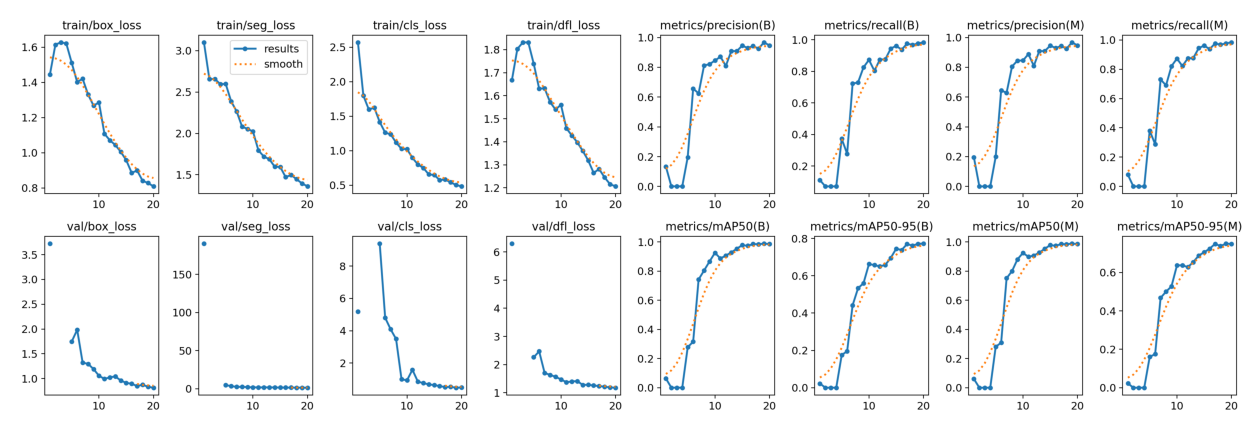

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/runs/segment/train3/results.png'

img = mpimg.imread(image_path)
# Set the figure size (e.g., 10 inches wide, 8 inches tall)
plt.figure(figsize=(16, 14
                  ))
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

mAP (mean Average Precision):

It is the mean of the Average Precision (AP) values calculated for all object classes in your dataset.
AP measures the precision-recall tradeoff for each class. Precision is the fraction of true positive predictions among all positive predictions, while recall is the fraction of true positives detected among all actual positives.
AP is computed as the area under the precision-recall curve for a class.

IoU ≥ 0.50 means a predicted box is considered a "true positive" if its IoU with the ground truth box is 50% or higher.

When training and evaluating a YOLOv11 model, the framework will typically output both mAP50 and mAP@[.50:.95] to give you a comprehensive view of the model's performance.

Higher mAP50 means your model detects objects well, but you should also monitor mAP@[.50:.95] for robustness across stricter IoU thresholds.

## Uploading the best weights of the model after custom training

In [ ]:
model = YOLO("/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/runs/segment/train3/weights/best.pt")

## Making a prediction on a test image with the Yolo11 Segmentation model


image 1/1 /content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg: 640x640 1 tumor, 55.7ms
Speed: 2.1ms preprocess, 55.7ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)


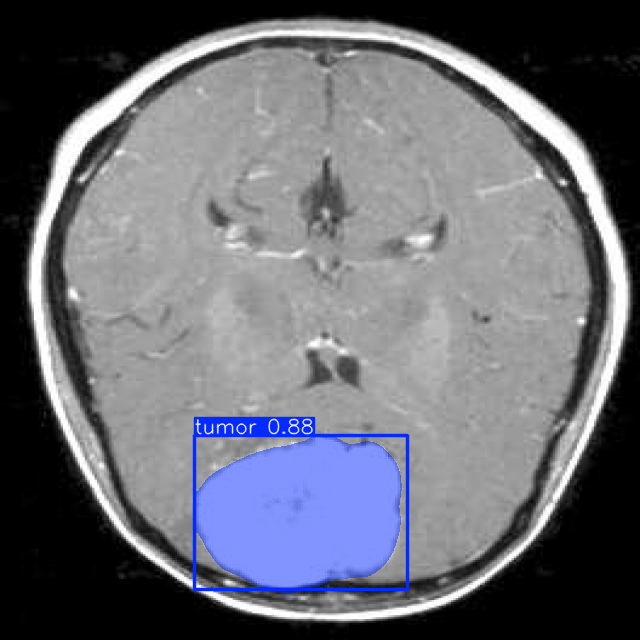

In [ ]:
results = model("/content/drive/MyDrive/BRAIN-TUMOR.v1i.yolov11/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg")
results[0].show()